# Setting

In [1]:
from pf_utils import BacktestManager, DataManager

WARNING (pytensor.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


In [2]:
metrics2 = [
    'cagr', 'monthly_vol', 'monthly_sharpe',
    'max_drawdown', 'avg_drawdown','avg_drawdown_days', 
]

path_data = 'data'

## Implement

### class

### test

# Universe

In [3]:
#file = 'kospi200_prices_240704.csv'
file = 'kospi200_prices_240707l.csv'

k200 = DataManager(file, path_data)
df_k200 = k200.upload()

 200 assets from 2010-01-04 to 2024-07-05 uploaded.


# BacktestManager

## create class

In [7]:
kwargs_bm = dict(
    initial_capital = 10000000,
    commissions = 0,
    align_axis = 1, 
    days_in_year = 247
)
bm = BacktestManager(df_k200, **kwargs_bm)

60 assets removed for shorter periods (30.0%)
running self.util_check_days_in_year to check days in a year


In [8]:
bm.util_check_days_in_year(freq='Y').agg(['mean', 'min', 'max'])

mean    246.0
min     246.0
max     246.0
dtype: float64

## define strategy by keywords

In [9]:
kwargs_build = dict(
    name = 'strategy1',
    freq = 'M', select = 'Momentum', weigh = 'ERC',
    n_assets=5, lookback=12, lag=0
)
bm.build(**kwargs_build)

In [10]:
kwargs_build = dict(
    name = 'strategy2',
    freq = 'M', select = 'Momentum', weigh = 'equally',
    n_assets=5, lookback=12, lag=0
)
bm.build(**kwargs_build)

*you could use build_batch instead*

In [11]:
kwargs_build = dict(
    freq = 'M', select = 'Momentum',
    n_assets=5, lookback=12, lag=0
)
kwa_list = [
    {'name':'strategy1', 'weigh':'ERC'},
    {'name':'strategy2', 'weigh':'equally'}
]
bm.build_batch(*kwa_list, **kwargs_build)

## buy and hold

In [12]:
bm.buy_n_hold('buy&hold', weights='005930')

RunOnce selected


## baseline

In [15]:
name = 'KOSPI'
ticker = '069500'
df_kospi = bm.util_import_data(ticker, name=name)

In [16]:
bm.benchmark(df_kospi)

RunOnce selected


## run backtest

Backtesting 4 strategies: strategy1, strategy2, buy&hold, KOSPI


100%|█████████████████████████████████████████████████████████████████| 4/4 [00:11<00:00,  2.85s/it]

Returning stats


,strategy1,strategy2,buy&hold,KOSPI
start,2010-01-03 00:00:00,2010-01-03 00:00:00,2010-01-03 00:00:00,2010-01-03 00:00:00
end,2024-07-05 00:00:00,2024-07-05 00:00:00,2024-07-05 00:00:00,2024-07-05 00:00:00
total_return,88.886088,96.300525,4.382856,1.253297
cagr,0.363688,0.371162,0.123069,0.057617
calmar,0.693714,0.68642,0.291651,0.151281
max_drawdown,-0.524263,-0.540722,-0.421972,-0.380858
avg_drawdown,-0.064646,-0.064266,-0.061858,-0.034019
avg_drawdown_days,44.116505,43.740385,79.515625,79.328125
daily_vol,0.339895,0.348258,0.264336,0.170957
daily_sharpe,1.101748,1.099505,0.580226,0.420096


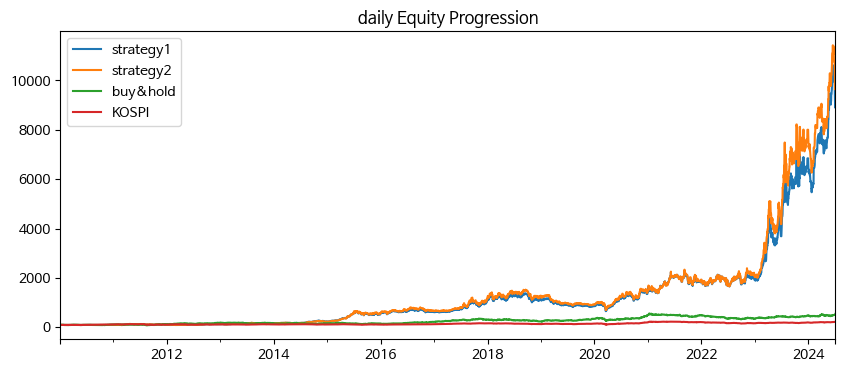

In [17]:
bm.run(figsize=(10,4))

## define strategy for debugging or more combinations

In [19]:
import bt
import pandas as pd

name='WeighERC does not work with SelectRandomly'

algos = [
    bt.algos.SelectAll(),

    bt.algos.SelectRandomly(n=5),
    #bt.algos.SelectMomentum(n=5, lookback=pd.DateOffset(months=12)),
    
    bt.algos.RunMonthly(),

    #bt.algos.SelectHasData(lookback=pd.DateOffset(months=12)),
    bt.algos.WeighERC(lookback=pd.DateOffset(months=12)),
    #bt.algos.WeighEqually(),
    
    bt.algos.Rebalance()
]

bm4d = BacktestManager(df_k200, **kwargs_bm)
bm4d.build(name=name, algos=algos)
_ = bm4d.run(figsize=(10,4))

60 assets removed for shorter periods (30.0%)
running self.util_check_days_in_year to check days in a year
Backtesting 1 strategies: WeighERC does not work with SelectRandomly


  0%|                                                                         | 0/1 [00:00<?, ?it/s]

ERROR: Found array with 0 sample(s) (shape=(0, 5)) while a minimum of 1 is required by LedoitWolf.


## Post-processing

In [20]:
bm.get_stats(sort_by='monthly_sharpe')

,strategy1,strategy2,buy&hold,KOSPI
start,2010-01-03 00:00:00,2010-01-03 00:00:00,2010-01-03 00:00:00,2010-01-03 00:00:00
end,2024-07-05 00:00:00,2024-07-05 00:00:00,2024-07-05 00:00:00,2024-07-05 00:00:00
total_return,88.886088,96.300525,4.382856,1.253297
cagr,0.363688,0.371162,0.123069,0.057617
calmar,0.693714,0.68642,0.291651,0.151281
max_drawdown,-0.524263,-0.540722,-0.421972,-0.380858
avg_drawdown,-0.064646,-0.064266,-0.061858,-0.034019
avg_drawdown_days,44.116505,43.740385,79.515625,79.328125
daily_vol,0.339895,0.348258,0.264336,0.170957
daily_sharpe,1.101748,1.099505,0.580226,0.420096


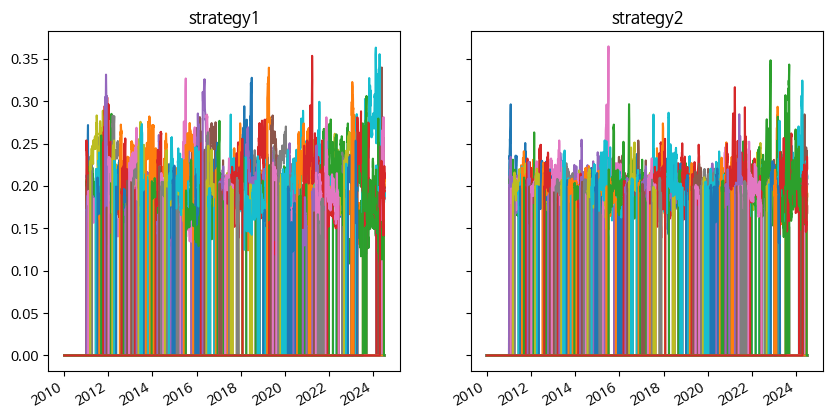

In [21]:
pf = ['strategy1', 'strategy2']
bm.plot_security_weights(pf, legend=False)

In [22]:
bm.get_historical(pf).tail()

,strategy1,strategy2
2024-07-01,9582.27427,10350.0880
2024-07-02,9178.13377,9953.6055
2024-07-03,9062.39827,9823.8840
2024-07-04,8898.86077,9632.3805
2024-07-05,8988.60877,9730.0525


In [23]:
bm.get_transactions(pf[1]).tail(10)

strategy2: transactions returned


price  quantity
Date       Security                    
2024-05-24 012450    204000.0    -730.0
           022100     37300.0    1422.0
           042700    147700.0      75.0
2024-06-25 000660    225000.0    -996.0
           003230    654000.0     -64.0
           004490    110300.0    1960.0
           010120    194900.0     253.0
           022100     37800.0   -5304.0
           036460     59400.0    3641.0
           042700    172900.0     -89.0

In [24]:
bm.get_security_weights(pf[1], stack=True)

strategy2: weights at transactions returned


Date              
2011-01-04  011780    0.199290
            017800    0.195419
            005850    0.199386
            003670    0.199060
            011170    0.192359
                        ...   
2024-06-25  003230    0.199566
            036460    0.199988
            042700    0.199848
            004490    0.199907
            010120    0.199866
Name: weight, Length: 795, dtype: float64

In [26]:
bm.get_balance(pf[0])

strategy1: quantity of securities on 2024-06-25 returned


Security
003230     299
004490    1984
010120     975
036460    3701
042700    1042
Name: volume, dtype: int64

# Momentum

### Casestudy

In [29]:
kwargs_bm = dict(
    initial_capital = 10000000,
    commissions = 0,
    align_axis = 1, 
    days_in_year = 247,
    metrics = metrics2
)

#### Lookback

In [30]:
bm = BacktestManager(df_k200, **kwargs_bm)

60 assets removed for shorter periods (30.0%)
running self.util_check_days_in_year to check days in a year


In [31]:
kwargs_build = dict(
    select = 'Momentum', weigh = 'ERC',
    n_assets = 5,
    #lookback = 12,
    lag = 0,
    freq='M'
)

kwa_list = [{'name':f'{x} month lookback', 'lookback':x} for x in [3, 6, 12, 24]]

bm.build_batch(*kwa_list, **kwargs_build)

Backtesting 4 strategies: 3 month lookback, 6 month lookback, 12 month lookback, 24 month lookback


100%|█████████████████████████████████████████████████████████████████| 4/4 [00:21<00:00,  5.44s/it]

Returning stats


,3 month lookback,6 month lookback,12 month lookback,24 month lookback
start,2010-01-03 00:00:00,2010-01-03 00:00:00,2010-01-03 00:00:00,2010-01-03 00:00:00
end,2024-07-05 00:00:00,2024-07-05 00:00:00,2024-07-05 00:00:00,2024-07-05 00:00:00
cagr,0.287814,0.311404,0.363688,0.176837
monthly_vol,0.369386,0.387396,0.359611,0.369209
monthly_sharpe,0.854915,0.878221,1.037557,0.610714
max_drawdown,-0.60435,-0.617892,-0.524263,-0.591244
avg_drawdown,-0.066018,-0.06186,-0.064646,-0.075252
avg_drawdown_days,49.535354,49.90625,44.116505,61.6


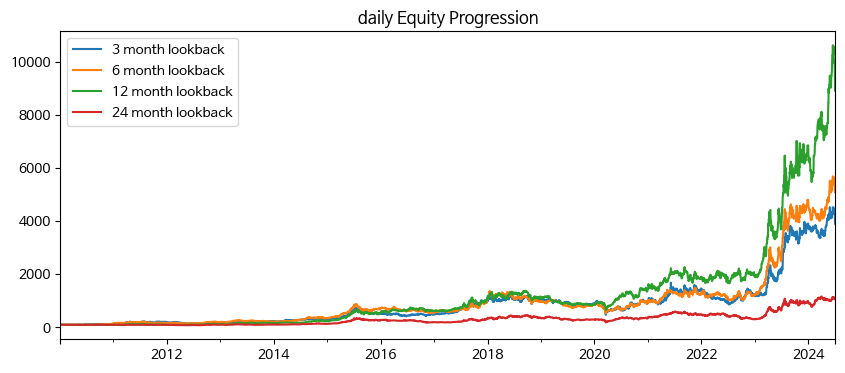

In [32]:
bm.run(figsize=(10,4))

#### Lag

In [33]:
bm = BacktestManager(df_k200, **kwargs_bm)

60 assets removed for shorter periods (30.0%)
running self.util_check_days_in_year to check days in a year


In [34]:
kwargs_build = dict(
    select = 'Momentum', weigh = 'ERC',
    n_assets = 5,
    lookback = 12,
    #lag = 0,
    freq='M'
)

kwa_list = [{'name':f'{x} day lag', 'lag':x} for x in [0, 5, 10, 20]]

bm.build_batch(*kwa_list, **kwargs_build)

Backtesting 4 strategies: 0 day lag, 5 day lag, 10 day lag, 20 day lag


100%|█████████████████████████████████████████████████████████████████| 4/4 [00:21<00:00,  5.32s/it]


Returning stats


,0 day lag,5 day lag,10 day lag,20 day lag
start,2010-01-03 00:00:00,2010-01-03 00:00:00,2010-01-03 00:00:00,2010-01-03 00:00:00
end,2024-07-05 00:00:00,2024-07-05 00:00:00,2024-07-05 00:00:00,2024-07-05 00:00:00
cagr,0.363688,0.366696,0.33587,0.325681
monthly_vol,0.359611,0.369647,0.366401,0.350388
monthly_sharpe,1.037557,1.024079,0.968651,0.976347
max_drawdown,-0.524263,-0.51659,-0.577036,-0.526307
avg_drawdown,-0.064646,-0.066529,-0.062222,-0.067133
avg_drawdown_days,44.116505,45.39,48.666667,44.45098


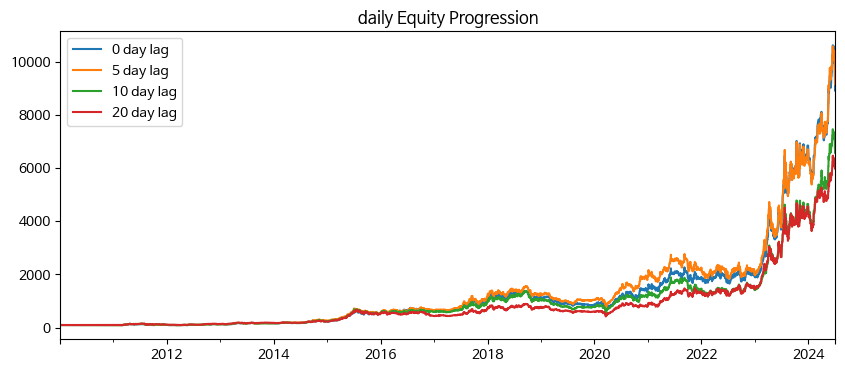

In [35]:
bm.run(figsize=(10,4))

#### Number of assets

In [36]:
bm = BacktestManager(df_k200, **kwargs_bm)

60 assets removed for shorter periods (30.0%)
running self.util_check_days_in_year to check days in a year


In [37]:
kwargs_build = dict(
    select = 'Momentum', weigh = 'ERC',
    #n_assets = 5,
    lookback = 12,
    lag = 0,
    freq='M'
)

kwa_list = [{'name':f'{x} assets', 'n_assets':x} for x in [2, 5, 10]]

bm.build_batch(*kwa_list, **kwargs_build)

Backtesting 3 strategies: 2 assets, 5 assets, 10 assets


100%|█████████████████████████████████████████████████████████████████| 3/3 [00:15<00:00,  5.33s/it]

Returning stats


,2 assets,5 assets,10 assets
start,2010-01-03 00:00:00,2010-01-03 00:00:00,2010-01-03 00:00:00
end,2024-07-05 00:00:00,2024-07-05 00:00:00,2024-07-05 00:00:00
cagr,0.475184,0.363688,0.258254
monthly_vol,0.522119,0.359611,0.311596
monthly_sharpe,0.982554,1.037557,0.884751
max_drawdown,-0.630243,-0.524263,-0.479316
avg_drawdown,-0.091398,-0.064646,-0.061579
avg_drawdown_days,50.888889,44.116505,54.352941


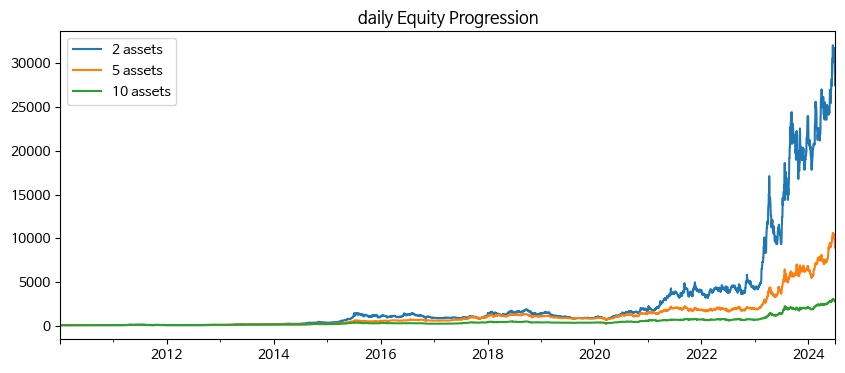

In [38]:
bm.run(figsize=(10,4))

#### Freq

In [39]:
bm = BacktestManager(df_k200, **kwargs_bm)

60 assets removed for shorter periods (30.0%)
running self.util_check_days_in_year to check days in a year


In [40]:
kwargs_build = dict(
    select = 'Momentum', weigh = 'ERC',
    n_assets = 5,
    lookback = 12,
    lag = 0,
    #freq='M'
)

kwa_list = [{'name':f'freq {x}', 'freq':x} for x in [10, 'M', 42, 'Q']]

bm.build_batch(*kwa_list, **kwargs_build)

Backtesting 4 strategies: freq 10, freq M, freq 42, freq Q


100%|█████████████████████████████████████████████████████████████████| 4/4 [00:20<00:00,  5.25s/it]

Returning stats


,freq 10,freq M,freq 42,freq Q
start,2010-01-03 00:00:00,2010-01-03 00:00:00,2010-01-03 00:00:00,2010-01-03 00:00:00
end,2024-07-05 00:00:00,2024-07-05 00:00:00,2024-07-05 00:00:00,2024-07-05 00:00:00
cagr,0.36852,0.363688,0.386991,0.383722
monthly_vol,0.354079,0.359611,0.360538,0.348175
monthly_sharpe,1.060135,1.037557,1.085257,1.107089
max_drawdown,-0.489099,-0.524263,-0.537375,-0.471833
avg_drawdown,-0.065941,-0.064646,-0.061435,-0.064778
avg_drawdown_days,42.896226,44.116505,37.099174,41.924528


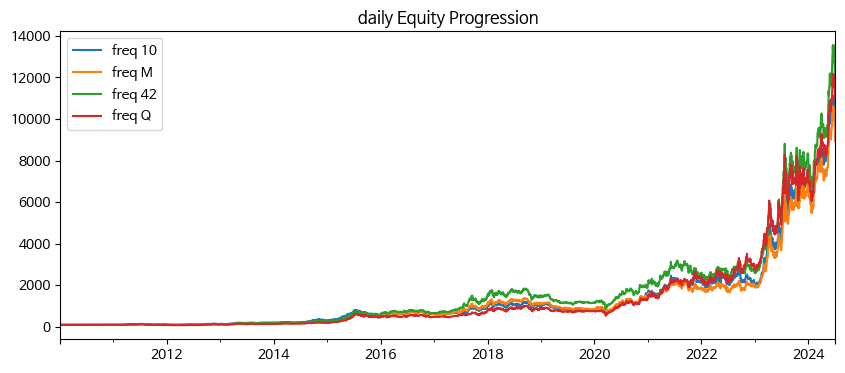

In [41]:
bm.run(figsize=(10,4))

#### Weighting

In [42]:
bm = BacktestManager(df_k200, **kwargs_bm)

60 assets removed for shorter periods (30.0%)
running self.util_check_days_in_year to check days in a year


In [43]:
kwargs_build = dict(
    select = 'Momentum', 
    freq='M', n_assets=5, lookback=12, lag=0
)
kwa_list = [{'name':x, 'weigh':x} for x in ['ERC', 'InvVol']]
bm.build_batch(*kwa_list, **kwargs_build)

Backtesting 2 strategies: ERC, InvVol


100%|█████████████████████████████████████████████████████████████████| 2/2 [00:10<00:00,  5.20s/it]

Returning stats


,ERC,InvVol
start,2010-01-03 00:00:00,2010-01-03 00:00:00
end,2024-07-05 00:00:00,2024-07-05 00:00:00
cagr,0.363688,0.36582
monthly_vol,0.359611,0.355249
monthly_sharpe,1.037557,1.052083
max_drawdown,-0.524263,-0.529421
avg_drawdown,-0.064646,-0.060261
avg_drawdown_days,44.116505,39.736842


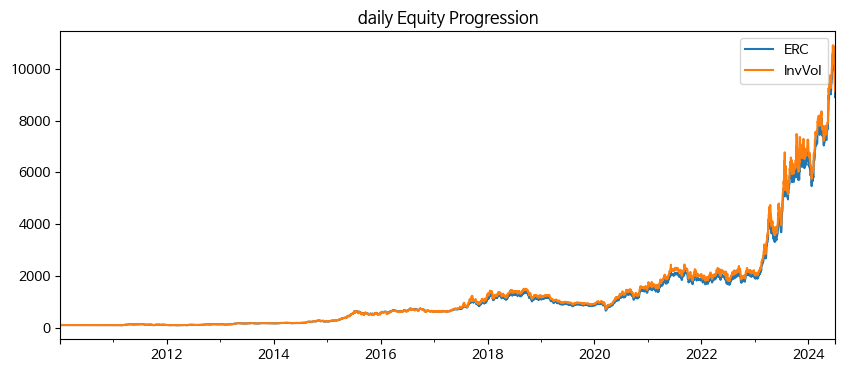

In [44]:
bm.run(figsize=(10,4))

## K-ratio

In [45]:
kwargs_bm = dict(
    initial_capital = 10000000,
    commissions = 0,
    align_axis = 1, 
    days_in_year = 247
)
bm = BacktestManager(df_k200, **kwargs_bm)

60 assets removed for shorter periods (30.0%)
running self.util_check_days_in_year to check days in a year


In [46]:
kwargs_build = dict(
    select = 'K-ratio', weigh = 'ERC',
    freq='M', n_assets=5, lag=0
)
kwa_list = [{'name':f'K-ratio: lookback {x}M', 'lookback':x} for x in [3, 6, 12]]

bm.build_batch(*kwa_list, **kwargs_build)

Backtesting 3 strategies: K-ratio: lookback 3M, K-ratio: lookback 6M, K-ratio: lookback 12M


100%|████████████████████████████████████████████████████████████████| 3/3 [12:53<00:00, 257.67s/it]

Returning stats
CPU times: user 12min 53s, sys: 100 ms, total: 12min 53s
Wall time: 12min 53s


,K-ratio: lookback 3M,K-ratio: lookback 6M,K-ratio: lookback 12M
start,2010-01-03 00:00:00,2010-01-03 00:00:00,2010-01-03 00:00:00
end,2024-07-05 00:00:00,2024-07-05 00:00:00,2024-07-05 00:00:00
total_return,2.028269,3.206726,2.571135
cagr,0.079395,0.104138,0.091738
calmar,0.125039,0.167405,0.123397
max_drawdown,-0.634958,-0.622075,-0.743435
avg_drawdown,-0.050759,-0.057562,-0.045229
avg_drawdown_days,61.580247,65.36,84.928571
daily_vol,0.253393,0.243726,0.25332
daily_sharpe,0.434499,0.536651,0.480407


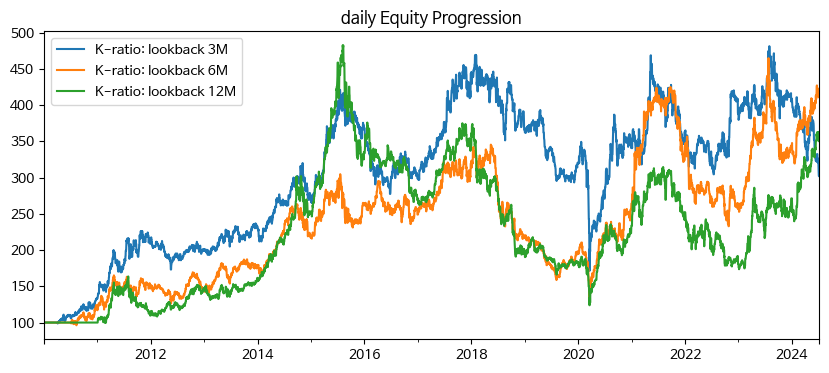

In [47]:
%%time
bm.run(figsize=(10,4))

In [50]:
kwargs_build = dict(
    name='Simple', select = 'Momentum', weigh = 'ERC',
    freq='M', n_assets=5, lookback=12
)
bm.build(**kwargs_build)

Backtesting 2 strategies: Simple, K-ratio: lookback 12M


100%|█████████████████████████████████████████████████████████████████| 2/2 [00:05<00:00,  2.59s/it]

Returning stats


,K-ratio: lookback 12M,Simple
start,2010-01-03 00:00:00,2010-01-03 00:00:00
end,2024-07-05 00:00:00,2024-07-05 00:00:00
total_return,2.571135,88.886088
cagr,0.091738,0.363688
calmar,0.123397,0.693714
max_drawdown,-0.743435,-0.524263
avg_drawdown,-0.045229,-0.064646
avg_drawdown_days,84.928571,44.116505
daily_vol,0.25332,0.339895
daily_sharpe,0.480407,1.101748


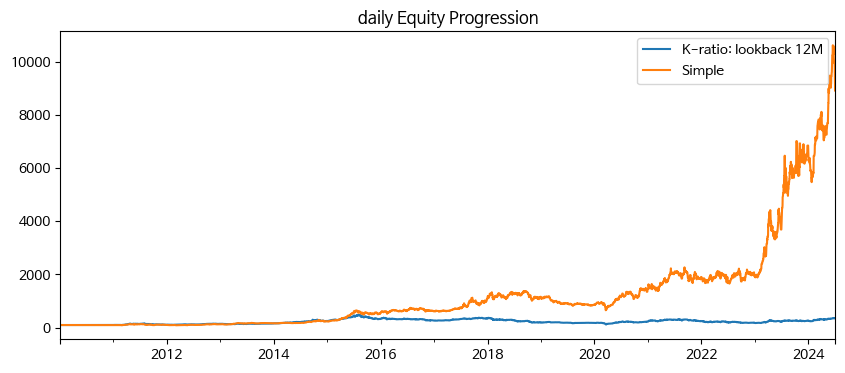

In [51]:
pf_list = ['Simple', 'K-ratio: lookback 12M']
bm.run(pf_list, figsize=(10,4))

#### cross-validation

In [52]:
bm.cv_strategies

0) K-ratio: lookback 3M
1) K-ratio: lookback 6M
2) K-ratio: lookback 12M
3) Simple

In [ ]:
pf_list = [2,3]
bm.cross_validate(pf_list, n_sample=10)